In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
from src.pytmd_utils import tidal_ellipse

In [28]:
#web api format
#localhost:8040/api/tide/const?lon=122.26672,123&lat=23.76175,24&mode=list&complex=amp,ph,hc&append=u,v&constituent=o1,p1,k1,n2,m2,s2&mode=row
def fetch_tide_data(lon, lat, constituent, append="u,v", complex="hc", mode="row"):
    # Construct the API endpoint
    url = f"https://eco.odb.ntu.edu.tw/api/tide/const?lon={lon}&lat={lat}&constituent={constituent}&mode={mode}&complex={complex}&append={append}"
    print(url)
    # Fetch the data
    response = requests.get(url)

    # Ensure we got a successful response
    if response.status_code != 200:
        print(f"Failed to get data. Status code: {response.status_code}")
        return None

    # Parse the JSON data
    data = response.json()
    return data

# Example usage:
#df = fetch_tide_data(122.26672, 23.76175, "o1")
#print(df)


In [21]:
pf4uv = pd.read_csv('./test_paper4_uv.csv')
print(pf4uv)

    Unnamed: 0 Location  O1_amp  O1_ph  P1_amp  P1_ph  K1_amp  K1_ph  N2_amp  \
0            0      WC1    5.42  260.9    2.61  314.2    7.89  307.2    5.69   
1            1      WC2    5.37  261.8    2.46  300.8    7.42  293.8    3.85   
2            2      WC3    4.11  254.1    1.76  300.5    5.33  293.5    2.77   
3            3      WC4    2.99  264.5    1.27  297.9    3.82  290.9    1.00   
4            4      EWC    6.13  237.8    3.09  288.5    9.33  281.4    4.91   
5            5      PHC    3.10  269.8    1.43  295.1    4.32  288.1    4.96   
6            6      WC1    2.96  245.6    1.57  314.7    4.73  307.6    3.07   
7            7      WC2    3.88  272.9    1.75  308.5    5.28  301.5    3.20   
8            8      WC3    3.61  256.1    1.66  309.3    5.03  302.3    1.98   
9            9      WC4    3.71  251.5    1.79  314.1    5.40  307.1    1.15   
10          10      EWC    3.82  256.6    2.39  296.8    7.24  289.8    2.66   
11          11      PHC    5.08  310.4  

In [22]:
loni = ','.join(pf4uv["longitude"].astype(str))
lati = ','.join(pf4uv["latitude"].astype(str))
parts = [col.replace('_amp', '') for col in pf4uv.columns if col.endswith('_amp')]
cons = ','.join(parts).lower() 
print(loni, lati)
print(cons)

119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666,119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666 24.98333333333333,24.83333333333333,24.65,24.466666666666665,25.0,23.85,24.98333333333333,24.83333333333333,24.65,24.466666666666665,25.0,23.85
o1,p1,k1,n2,m2,s2


In [23]:
lonu = ','.join(pf4uv.loc[pf4uv.type=="u", ["longitude"]].astype(str)["longitude"].values)
latu = ','.join(pf4uv.loc[pf4uv.type=="u", ["latitude"]].astype(str)["latitude"].values)
print(lonu)

119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666


In [29]:
zf4_hc = fetch_tide_data(loni, lati, cons, append="u,v", complex="hc", mode="row")
print(zf4_hc)

http://localhost:8040/api/tide/const?lon=119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666,119.48333333333332,119.8,120.13333333333334,120.46666666666668,120.13333333333334,119.86666666666666&lat=24.98333333333333,24.83333333333333,24.65,24.466666666666665,25.0,23.85,24.98333333333333,24.83333333333333,24.65,24.466666666666665,25.0,23.85&constituent=o1,p1,k1,n2,m2,s2&mode=row&complex=hc&append=u,v
[{'longitude': 119.48333333333332, 'latitude': 24.98333333333333, 'grid_lon': 119.4999986500837, 'grid_lat': 24.966667654160716, 'type': 'u', 'k1_imag': 6.576360720527782, 'k1_real': -0.07829683240021822, 'm2_imag': 7.698417928552914, 'm2_real': -9.686285722533379, 'n2_imag': 2.816862651628037, 'n2_real': -5.19118565191687, 'o1_imag': 4.427603054970623, 'o1_real': -3.0072057326152093, 'p1_imag': 2.262276970400119, 'p1_real': -0.42486708697705855, 's2_imag': 9.740284348016356, 's2_real': 0.5199775082059107}, {'longitude': 119.48333333333332, '

In [30]:
zf4_uvw = pd.DataFrame(zf4_hc)
print(zf4_uvw[["longitude","latitude","type","k1_real","k1_imag","m2_real","m2_imag"]])

     longitude   latitude type   k1_real   k1_imag    m2_real    m2_imag
0   119.483333  24.983333    u -0.078297  6.576361  -9.686286   7.698418
1   119.483333  24.983333    v  1.178355  2.364823  28.204286  -1.389315
2   119.800000  24.833333    u  1.002499  5.928887  -4.375604   6.647142
3   119.800000  24.833333    v  1.353364  4.200861  11.820746  -0.187692
4   119.866667  23.850000    u  0.013380  0.227787   9.151523   0.250008
5   119.866667  23.850000    v  4.602566  0.532851  68.843572 -19.761929
6   120.133333  24.650000    u  0.973084  4.665125  -1.588077   3.491187
7   120.133333  24.650000    v  1.161685  4.120416   7.852614  -1.722534
8   120.133333  25.000000    u  0.034924  6.099916 -17.843212  -0.925344
9   120.133333  25.000000    v  0.021852  4.786510  -2.325354  -2.139166
10  120.466667  24.466667    u  0.609761  3.064694   2.177588   2.840419
11  120.466667  24.466667    v  0.895916  4.362011   2.921890   3.613256


In [8]:
def get_tidal_ellipse_dataframe_wide(df, constituent, uppercase=False):
    major_list = []
    minor_list = []
    inclination_list = []
    phase_list = []
    lon_list = []
    lat_list = []
    
    unique_locations = df.drop_duplicates(subset=['longitude', 'latitude'])

    for _, location in unique_locations.iterrows():
        lon = location['longitude']
        lat = location['latitude']

        lon_list.append(lon)
        lat_list.append(lat)

        u_data = df[(df['longitude'] == lon) & (df['latitude'] == lat) & (df['type'] == 'u')]
        v_data = df[(df['longitude'] == lon) & (df['latitude'] == lat) & (df['type'] == 'v')]

        # If either u_data or v_data is empty, we can't proceed, so append NaNs
        if u_data.empty or v_data.empty:
            major_list.append(np.nan)
            minor_list.append(np.nan)
            inclination_list.append(np.nan)
            phase_list.append(np.nan)
            continue
        
        realvar = f'{constituent.upper()}_real' if uppercase else f'{constituent.lower()}_real'
        imagvar = f'{constituent.upper()}_imag' if uppercase else f'{constituent.lower()}_imag'
        ampvar = f'{constituent.upper()}_amp' if uppercase else f'{constituent.lower()}_amp'
        phvar = f'{constituent.upper()}_ph' if uppercase else f'{constituent.lower()}_ph'
        if realvar in u_data.columns and realvar in v_data.columns:
            hc_u = u_data[realvar].values[0] + 1j * u_data[imagvar].values[0]
            hc_v = v_data[realvar].values[0] + 1j * v_data[imagvar].values[0]
        else:
            u_amp = u_data[ampvar].values[0]
            v_amp = v_data[ampvar].values[0]
            u_phase = u_data[phvar].values[0] * np.pi / 180.0
            v_phase = v_data[phvar].values[0] * np.pi / 180.0         
            hc_u = u_amp * np.exp(-1j * u_phase)
            hc_v = v_amp * np.exp(-1j * v_phase)
            
        major, minor, inclination, phase = tidal_ellipse(np.atleast_1d(hc_u), np.atleast_1d(hc_v))

        major_list.append(major[0])
        minor_list.append(minor[0])
        inclination_list.append(inclination[0])
        phase_list.append(phase[0])

    return lon_list, lat_list, major_list, minor_list, inclination_list, phase_list

In [9]:
def get_tidal_ellipse_dataframe(df, constituent, unit_conv=1):
    major_list = []
    minor_list = []
    inclination_list = []
    phase_list = []
    lon_list = []
    lat_list = []
    
    unique_locations = df.drop_duplicates(subset=['longitude', 'latitude'])
    
    for _, location in unique_locations.iterrows():
        lon = location['longitude']
        lat = location['latitude']
        
        lon_list.append(lon)
        lat_list.append(lat)
        
        location_filter = (df['longitude'] == lon) & (df['latitude'] == lat) & (df['constituents'] == constituent)
        location_data = df[location_filter]
        
        if location_data.empty:
            major_list.append(np.nan)
            minor_list.append(np.nan)
            inclination_list.append(np.nan)
            phase_list.append(np.nan)
            continue
        
        if 'real' in location_data['variable'].values and 'imag' in location_data['variable'].values:
            u_real = location_data.loc[(location_data['variable'] == 'real') & (location_data['type'] == 'u'), 'value'].values[0] * unit_conv
            u_imag = location_data.loc[(location_data['variable'] == 'imag') & (location_data['type'] == 'u'), 'value'].values[0] * unit_conv
            v_real = location_data.loc[(location_data['variable'] == 'real') & (location_data['type'] == 'v'), 'value'].values[0] * unit_conv
            v_imag = location_data.loc[(location_data['variable'] == 'imag') & (location_data['type'] == 'v'), 'value'].values[0] * unit_conv
            
            hc_u = u_real + 1j * u_imag
            hc_v = v_real + 1j * v_imag
        else:
            u_amp = location_data.loc[(location_data['variable'] == 'amplitude') & (location_data['type'] == 'u'), 'value'].values[0] * unit_conv
            v_amp = location_data.loc[(location_data['variable'] == 'amplitude') & (location_data['type'] == 'v'), 'value'].values[0] * unit_conv
            u_phase = location_data.loc[(location_data['variable'] == 'phase') & (location_data['type'] == 'u'), 'value'].values[0] * np.pi / 180.0  # to radians
            v_phase = location_data.loc[(location_data['variable'] == 'phase') & (location_data['type'] == 'v'), 'value'].values[0] * np.pi / 180.0  # to radians
            
            hc_u = u_amp * np.exp(-1j * u_phase)
            hc_v = v_amp * np.exp(-1j * v_phase)
        
        major, minor, inclination, phase = tidal_ellipse(np.atleast_1d(hc_u), np.atleast_1d(hc_v))
        
        major_list.append(major[0])
        minor_list.append(minor[0])
        inclination_list.append(inclination[0])
        phase_list.append(phase[0])
        
    return lon_list, lat_list, major_list, minor_list, inclination_list, phase_list


In [10]:
pf4uv.loc[pf4uv["type"]=="u",["Location", "longitude", "latitude"]]

,Location,longitude,latitude
0,WC1,119.483333,24.983333
1,WC2,119.800000,24.833333
2,WC3,120.133333,24.650000
3,WC4,120.466667,24.466667
4,EWC,120.133333,25.000000
5,PHC,119.866667,23.850000


In [31]:
lon_k1, lat_k1, major_k1, minor_k1, inclination_k1, phase_k1 = get_tidal_ellipse_dataframe_wide(zf4_uvw, 'k1')
print(major_k1)
print(minor_k1)
print(inclination_k1)
print(phase_k1)

[6.996386604356103, 7.441305371822578, 4.633476733035087, 6.402275533935816, 7.753794597343117, 5.4400105444937825]
[1.1340771907786324, 0.5123536296104998, 0.2247281570977262, 0.22021783695481334, -0.004368251599641049, 0.015795099060792683]
[20.221950004701682, 36.19229879250122, 89.51054739270094, 41.92718106050492, 38.12055893460217, 54.942424854297485]
[92.7349399116784, 102.48123902720744, 353.3723759810851, 103.55162646241192, 90.30270255313803, 101.4898647358126]


In [32]:
loc_merged = pd.merge(pd.DataFrame({"longitude":lon_k1, "latitude":lat_k1}), pf4uv.loc[pf4uv["type"]=="u",["Location", "longitude", "latitude"]], on=["longitude", "latitude"], how="left")
print(loc_merged)

    longitude   latitude Location
0  119.483333  24.983333      WC1
1  119.800000  24.833333      WC2
2  119.866667  23.850000      PHC
3  120.133333  24.650000      WC3
4  120.133333  25.000000      EWC
5  120.466667  24.466667      WC4


In [13]:
def plot_ellipses_map(lons, lats, major_axes, minor_axes, inclinations, annotations=None, scale_factor=0.0001, buf=2.5):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', 'box')
    
    # Create the Basemap object
    lon_min, lon_max, lat_min, lat_max = np.min(lons)-buf, np.max(lons)+buf, np.min(lats)-buf, np.max(lats)+buf

    # Round the min/max to the nearest 5 for setting ticks
    lon_start = int(5 * (lon_min // 5))
    lon_end = int(5 * (lon_max // 5 + 1))

    lat_start = int(5 * (lat_min // 5))
    lat_end = int(5 * (lat_max // 5 + 1))

    m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
                llcrnrlon=lon_min, urcrnrlon=lon_max, lat_ts=20, ax=ax, resolution='i')

    # Convert x, y to map projection coordinates
    x_map, y_map = m(lons, lats)
    
    # Draw ellipses on the map
    for i, (x, y, major, minor, inclination) in enumerate(zip(x_map, y_map, major_axes, minor_axes, inclinations)):
        scaled_major = major * scale_factor
        scaled_minor = minor * scale_factor
        
        ellipse = patches.Ellipse((x, y), width=2*scaled_major*m.xmax, height=2*scaled_minor*m.ymax, angle=inclination,
                                  fill=False, edgecolor='r', linewidth=2)
        ax.add_patch(ellipse)
        
        # Add annotations if provided
        if annotations is not None and len(annotations) > 0:
            ax.text(x, y, annotations[i], color='grey', fontsize=8, ha='center', va='center')

    # Add coastlines
    m.drawcoastlines()

    # Add ticks for meridians and parallels
    parallels = range(lat_start, lat_end, 5)
    meridians = range(lon_start, lon_end, 5)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5, fontsize=10)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5, fontsize=10)

    plt.show()

/tmp/ipykernel_382314/1073862692.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  loc_merged['Location'].ravel(), 0.01, 2)


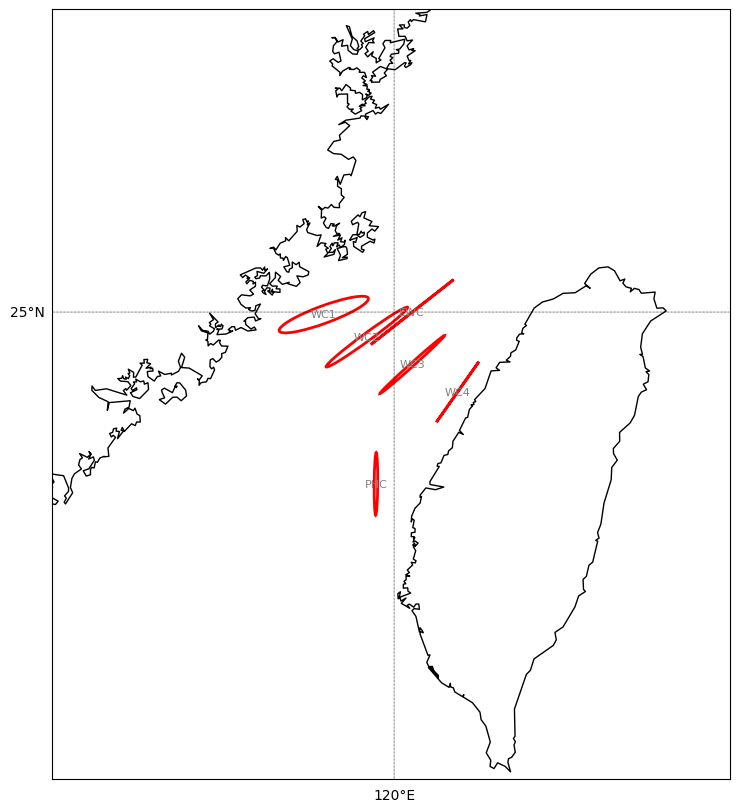

In [33]:
plot_ellipses_map(lon_k1, lat_k1, major_k1, minor_k1, inclination_k1, 
                  loc_merged['Location'].ravel(), 0.01, 2)

/tmp/ipykernel_382314/2561493892.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  loc_mergep['Location'].ravel(), 0.01, 2)


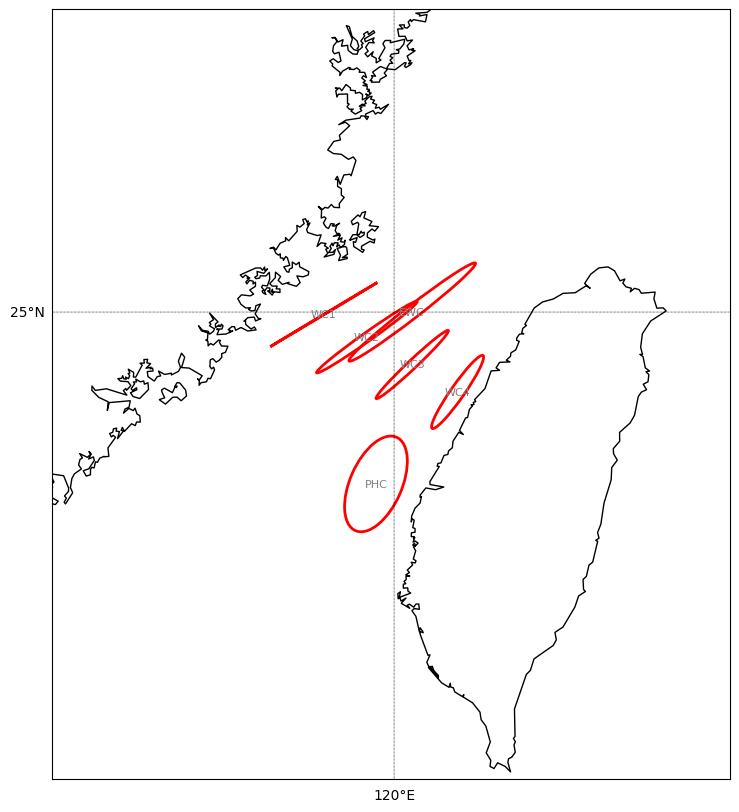

In [15]:
lon_k1p, lat_k1p, major_k1p, minor_k1p, inclination_k1p, phase_k1p = get_tidal_ellipse_dataframe_wide(pf4uv, 'k1', uppercase=True)
loc_mergep = pd.merge(pd.DataFrame({"longitude":lon_k1p, "latitude":lat_k1p}), pf4uv.loc[pf4uv["type"]=="u",["Location", "longitude", "latitude"]], on=["longitude", "latitude"], how="left")
plot_ellipses_map(lon_k1p, lat_k1p, major_k1p, minor_k1p, inclination_k1p, 
                  loc_mergep['Location'].ravel(), 0.01, 2)

In [34]:
lon_m2, lat_m2, major_m2, minor_m2, inclination_m2, phase_m2 = get_tidal_ellipse_dataframe_wide(zf4_uvw, 'm2')
print(major_m2)
print(minor_m2)
print(inclination_m2)
print(phase_m2)

[30.07735874384372, 12.917658327652049, 72.15434237485749, 8.41009899096858, 18.034161529769463, 5.8649398814003195]
[6.771574711727606, 6.019118605061219, 2.7449930417298916, 2.9344988792394306, -1.9972011667452012, 0.0735232086023423]
[110.69334856003377, 117.0950607574787, 83.04268327150182, 108.26089888177306, 7.851316614418806, 52.39816706846944]
[7.680958067609716, 14.318338687232789, 15.750433313113291, 18.939992718020434, 356.1564048732747, 308.40787251255256]


/tmp/ipykernel_382314/66925383.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  loc_merged['Location'].ravel(), 0.001, 2)


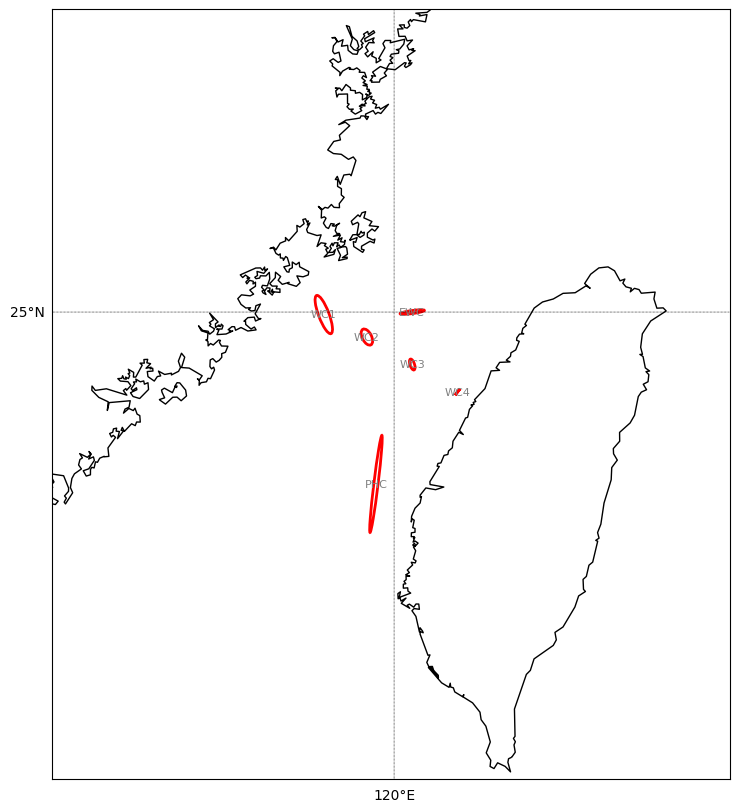

In [35]:
plot_ellipses_map(lon_m2, lat_m2, major_m2, minor_m2, inclination_m2, 
                  loc_merged['Location'].ravel(), 0.001, 2)

/tmp/ipykernel_382314/3603515848.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  loc_mergep['Location'].ravel(), 0.001, 2)


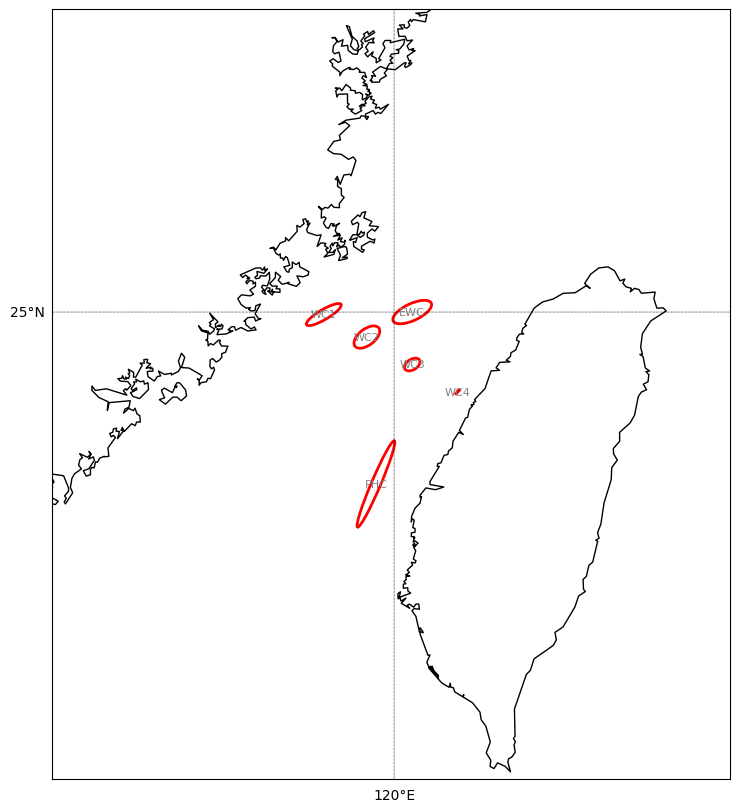

In [20]:
lon_m2p, lat_m2p, major_m2p, minor_m2p, inclination_m2p, phase_m2p = get_tidal_ellipse_dataframe_wide(pf4uv, 'm2', uppercase=True)
loc_mergep = pd.merge(pd.DataFrame({"longitude":lon_m2p, "latitude":lat_m2p}), pf4uv.loc[pf4uv["type"]=="u",["Location", "longitude", "latitude"]], on=["longitude", "latitude"], how="left")
plot_ellipses_map(lon_m2p, lat_m2p, major_m2p, minor_m2p, inclination_m2p, 
                  loc_mergep['Location'].ravel(), 0.001, 2)